In [1]:
import numpy as np
import pandas as pd
file = (r"Refined_OriginalDistributions2.csv")
Disorder_Fractions= pd.read_csv(file)
Disorder_Fractions.head()

,Unnamed: 0,Protein_Fractions,NUC_Fractions,Normal_Fractions
0,0,0.033333,0.536232,0.033333
1,1,0.208955,0.485714,0.102564
2,2,0.536232,0.398734,0.192188
3,3,0.461078,0.044610,0.468254
4,4,0.402778,0.433190,0.432432


In [2]:
Protein_Fractions= Disorder_Fractions.iloc[:,(1)].values
NUC_Fractions= Disorder_Fractions.iloc[:,(2)].values
Normal_Fractions= Disorder_Fractions.iloc[:,(3)].values

In [3]:
Protein_Fractions= [x for x in Protein_Fractions if ~np.isnan(x)]
NUC_Fractions= [x for x in NUC_Fractions if ~np.isnan(x)]
Normal_Fractions= [x for x in Normal_Fractions if ~np.isnan(x)]

In [4]:
len(NUC_Fractions)

12

In [5]:
print(min(Protein_Fractions))
print(max(Protein_Fractions))
print(np.median(Protein_Fractions))

0.005591524426133019
1.0
0.3461538461538461


In [6]:
print(min(NUC_Fractions))
print(max(NUC_Fractions))
print(np.median(NUC_Fractions))

0.027857829010566763
1.0
0.41596191619380185


In [7]:
print(min(Normal_Fractions))
print(max(Normal_Fractions))
print(np.median(Normal_Fractions))

0.005591524426133019
1.0
0.2762791021887634


In [8]:
from scipy.stats import ks_2samp
Comb_Dist=[Protein_Fractions,NUC_Fractions,Normal_Fractions]
KS=[]
b=0
for b in range(0,len(Comb_Dist),1):
    p_value=[]
    c=0
    for c in range(0,len(Comb_Dist),1):
        ks,p=ks_2samp(Comb_Dist[b],Comb_Dist[c])
        p_value.append(p)
    KS.append(p_value)

In [9]:
JABU = pd.DataFrame(KS)
JABU 

,0,1,2
0,1.000000,0.313880,0.156388
1,0.313880,1.000000,0.411491
2,0.156388,0.411491,1.000000


In [10]:
Zero_count=0
One_count=0
Two_count=0
Three_count=0
Four_count=0
Five_count=0
Six_count=0
Seven_count=0
Eight_count=0
Nine_count=0
b=0
Fraction_List=NUC_Fractions
for b in range(0,len(Fraction_List),1):
         if Fraction_List[b]<=0.1:Zero_count=Zero_count+1
         elif Fraction_List[b]<=0.2:One_count=One_count+1
         elif Fraction_List[b]<=0.3:Two_count=Two_count+1
         elif Fraction_List[b]<=0.4:Three_count=Three_count+1
         elif Fraction_List[b]<=0.5:Four_count=Four_count+1
         elif Fraction_List[b]<=0.6:Five_count=Five_count+1
         elif Fraction_List[b]<=0.7:Six_count=Six_count+1
         elif Fraction_List[b]<=0.8:Seven_count=Seven_count+1
         elif Fraction_List[b]<=0.9:Eight_count=Eight_count+1
         elif Fraction_List[b]<=1.0:Nine_count=Nine_count+1
Fration_Fractions=[Zero_count/len(Fraction_List),
One_count/len(Fraction_List),
Two_count/len(Fraction_List),
Three_count/len(Fraction_List),
Four_count/len(Fraction_List),
Five_count/len(Fraction_List),
Six_count/len(Fraction_List),
Seven_count/len(Fraction_List),
Eight_count/len(Fraction_List),
Nine_count/len(Fraction_List)]

In [11]:
Fration_Fractions

[0.4166666666666667,
 0.0,
 0.0,
 0.08333333333333333,
 0.16666666666666666,
 0.08333333333333333,
 0.08333333333333333,
 0.0,
 0.0,
 0.16666666666666666]

In [12]:
def Function_Counts(Fraction_List):
         Range_Counts=[Fration_Fractions[0]*len(Fraction_List),
                        Fration_Fractions[1]*len(Fraction_List),
                        Fration_Fractions[2]*len(Fraction_List),
                        Fration_Fractions[3]*len(Fraction_List),
                        Fration_Fractions[4]*len(Fraction_List),
                        Fration_Fractions[5]*len(Fraction_List),
                        Fration_Fractions[6]*len(Fraction_List),
                        Fration_Fractions[7]*len(Fraction_List),
                        Fration_Fractions[8]*len(Fraction_List),
                        Fration_Fractions[9]*len(Fraction_List)]
         return Range_Counts

In [13]:
Protein_Counts=Function_Counts(Protein_Fractions)
NUC_Counts=Function_Counts(NUC_Fractions)
Normal_Counts=Function_Counts(Normal_Fractions)

In [14]:
def Modify_Content(Fraction_List,Count_List):
		Zero_count=0
		One_count=0
		Two_count=0
		Three_count=0
		Four_count=0
		Five_count=0
		Six_count=0
		Seven_count=0
		Eight_count=0
		Nine_count=0
		Zero_fractions=[]
		One_fractions=[]
		Two_fractions=[]
		Three_fractions=[]
		Four_fractions=[]
		Five_fractions=[]
		Six_fractions=[]
		Seven_fractions=[]
		Eight_fractions=[]
		Nine_fractions=[]
		Zero_indexes=[]
		One_indexes=[]
		Two_indexes=[]
		Three_indexes=[]
		Four_indexes=[]
		Five_indexes=[]
		Six_indexes=[]
		Seven_indexes=[]
		Eight_indexes=[]
		Nine_indexes=[]
		b=0
		for b in range(0,len(Fraction_List),1):
				if 0.0<Fraction_List[b]<=0.1 and Zero_count<Count_List[0]:
								Zero_fractions.append(Fraction_List[b])
								Zero_indexes.append(b)
								Zero_count=Zero_count+1
				if 0.1 <Fraction_List[b]<=0.2 and One_count<Count_List[1]:
								One_fractions.append(Fraction_List[b])
								One_indexes.append(b)
								One_count=One_count+1
				if 0.2<Fraction_List[b]<=0.3 and Two_count<Count_List[2]:
								Two_fractions.append(Fraction_List[b])
								Two_indexes.append(b)
								Two_count=Two_count+1
				if 0.3<Fraction_List[b]<=0.4 and Three_count<Count_List[3]:
								Three_fractions.append(Fraction_List[b])
								Three_indexes.append(b)
								Three_count=Three_count+1
				if 0.4<Fraction_List[b]<=0.5 and Four_count<Count_List[4]:
								Four_fractions.append(Fraction_List[b])
								Four_indexes.append(b)
								Four_count=Four_count+1
				if 0.5<Fraction_List[b]<=0.6 and Five_count<Count_List[5]:
								Five_fractions.append(Fraction_List[b])
								Five_indexes.append(b)
								Five_count=Five_count+1
				if 0.6<Fraction_List[b]<=0.7 and Six_count<Count_List[6]:
								Six_fractions.append(Fraction_List[b])
								Six_indexes.append(b)
								Six_count=Six_count+1
				if 0.7<Fraction_List[b]<=0.8 and Seven_count<Count_List[7]:
								Seven_fractions.append(Fraction_List[b])
								Seven_indexes.append(b)
								Seven_count=Seven_count+1
				if 0.8<Fraction_List[b]<=0.9 and Eight_count<Count_List[8]:
								Eight_fractions.append(Fraction_List[b])
								Eight_indexes.append(b)
								Eight_count=Eight_count+1
				if 0.9<Fraction_List[b]<=1.0 and Nine_count<Count_List[9]:
								Nine_fractions.append(Fraction_List[b])
								Nine_indexes.append(b)
								Nine_count=Zero_count+1
		Combined_Fractions= Zero_fractions+One_fractions+Two_fractions+Three_fractions+Four_fractions+Five_fractions+Six_fractions+Seven_fractions+Eight_fractions+Nine_fractions 
		Combined_indexes= Zero_indexes+One_indexes+Two_indexes+Three_indexes+Four_indexes+Five_indexes+Six_indexes+Seven_indexes+Eight_indexes+Nine_indexes 
		return Combined_Fractions, Combined_indexes                                                       

In [15]:
Protein_ModifiedFractions,Protein_ModifiedIndexes=Modify_Content(Protein_Fractions,Protein_Counts)
NUC_ModifiedFractions,NUC_ModifiedIndexes=Modify_Content(NUC_Fractions,NUC_Counts)
Normal_ModifiedFractions,Normal_ModifiedIndexes=Modify_Content(Normal_Fractions,Normal_Counts)

In [16]:
Comb_Dist=[Protein_ModifiedFractions,NUC_ModifiedFractions,Normal_ModifiedFractions]
KS=[]
b=0
for b in range(0,len(Comb_Dist),1):
    p_value=[]
    c=0
    for c in range(0,len(Comb_Dist),1):
        ks,p=ks_2samp(Comb_Dist[b],Comb_Dist[c])
        p_value.append(p)
    KS.append(p_value)

In [17]:
JABU = pd.DataFrame(KS)
JABU 

,0,1,2
0,1.000000,0.779313,0.339002
1,0.779313,1.000000,0.811555
2,0.339002,0.811555,1.000000


In [18]:
print(min(Protein_ModifiedFractions))
print(max(Protein_ModifiedFractions))
print(np.median(Protein_ModifiedFractions))

0.005591524426133019
1.0
0.40075597749648384


In [19]:
print(min(NUC_ModifiedFractions))
print(max(NUC_ModifiedFractions))
print(np.median(NUC_ModifiedFractions))

0.027857829010566763
1.0
0.3987341772151899


In [20]:
print(min(Normal_ModifiedFractions))
print(max(Normal_ModifiedFractions))
print(np.median(Normal_ModifiedFractions))

0.005591524426133019
1.0
0.3138686131386861


In [21]:
ModifiedDistri_Indexes=pd.DataFrame({'Protein_ModifiedIndexe':pd.Series(Protein_ModifiedIndexes),                
                                     'NUC_ModifiedIndexes':pd.Series(NUC_ModifiedIndexes),
                                     'Normal_ModifiedIndexes':pd.Series(Normal_ModifiedIndexes)})   
ModifiedDistri_Indexes

,Protein_ModifiedIndexe,NUC_ModifiedIndexes,Normal_ModifiedIndexes
0,0.0,3.0,0
1,12.0,5.0,21
2,20.0,6.0,37
3,24.0,8.0,44
4,25.0,9.0,56
...,...,...,...
120,NaN,NaN,76
121,NaN,NaN,79
122,NaN,NaN,82
123,NaN,NaN,131


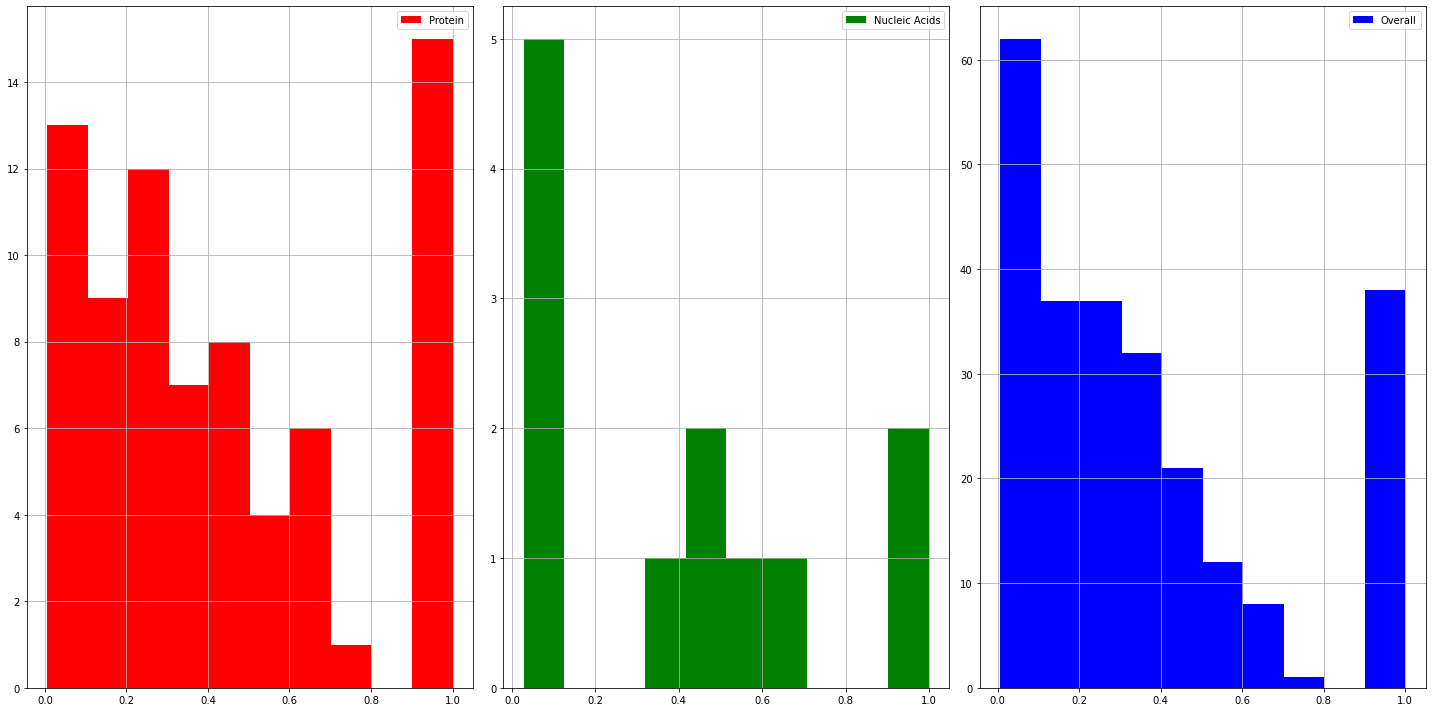

In [22]:
import matplotlib.pyplot as plt
n_bins = 10
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(20,10))
axs[0].hist(Protein_Fractions, bins=n_bins,color='r',label='Protein')
axs[0].grid()
axs[0].legend()
axs[1].hist(NUC_Fractions, bins=n_bins,color='g',label='Nucleic Acids')
axs[1].grid()
axs[1].legend()
axs[2].hist(Normal_Fractions, bins=n_bins,color='b',label='Overall')
axs[2].grid()
axs[2].legend()
plt.show()

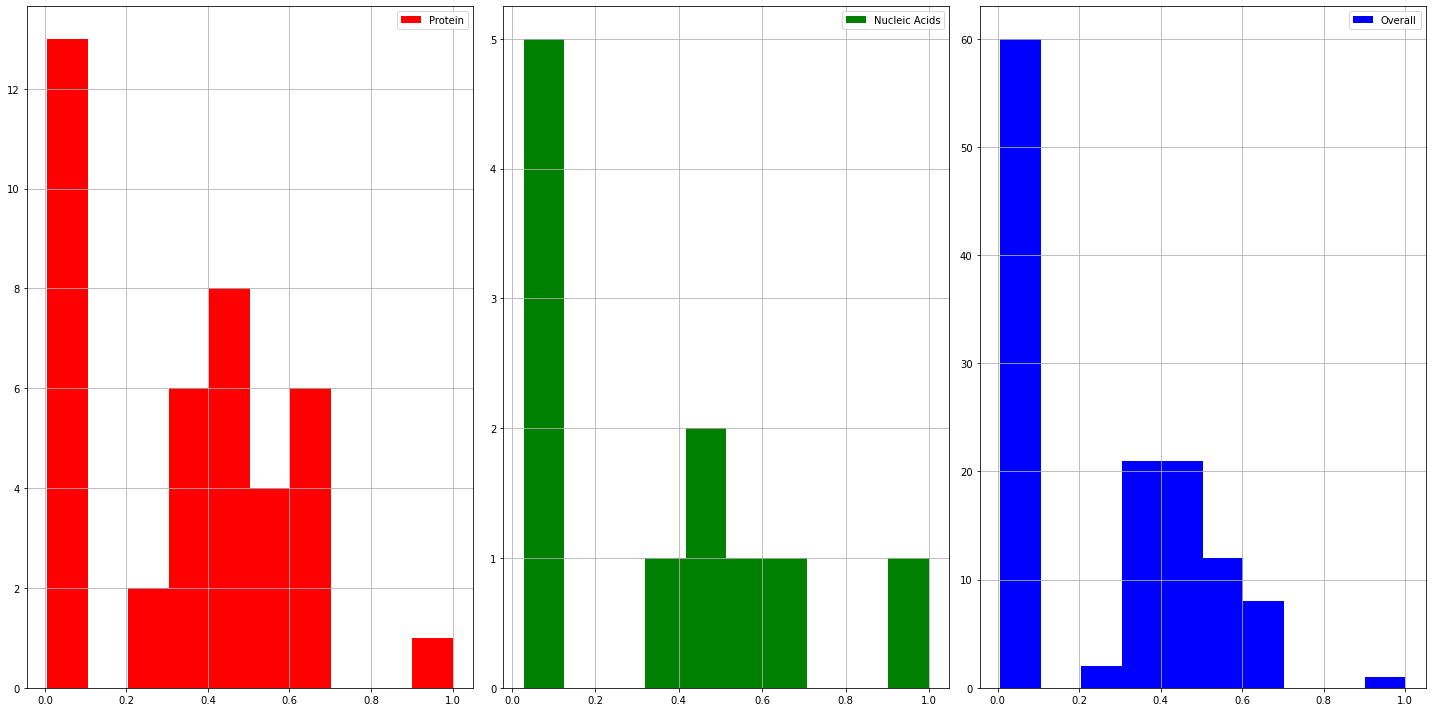

In [23]:
import matplotlib.pyplot as plt
n_bins = 10
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(20,10))
axs[0].hist(Protein_ModifiedFractions, bins=n_bins,color='r',label='Protein')

axs[0].grid()
axs[0].legend()
axs[1].hist(NUC_ModifiedFractions, bins=n_bins,color='g',label='Nucleic Acids')

axs[1].grid()
axs[1].legend()
axs[2].hist(Normal_ModifiedFractions, bins=n_bins,color='b',label='Overall')

axs[2].grid()
axs[2].legend()
plt.show()

In [24]:
#ModifiedDistri_Indexes.to_csv('Refined_ModifiedDistri_Indexes3.csv')